# Basic ANN - Celcius to Farenhite change - Tensorflow

$T(°F) = T(°C) × 9/5 + 32$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
data= pd.read_csv("../DATA/Celsius+to+Fahrenheit (1).csv")
data.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


array([[<AxesSubplot:title={'center':'Celsius'}>,
        <AxesSubplot:title={'center':'Fahrenheit'}>]], dtype=object)

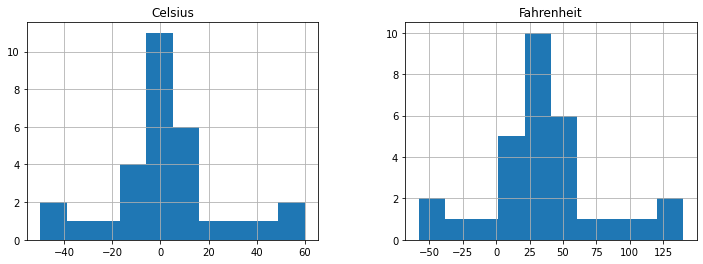

In [3]:
data.hist(figsize=(12,4))

<AxesSubplot:xlabel='Celsius', ylabel='Fahrenheit'>

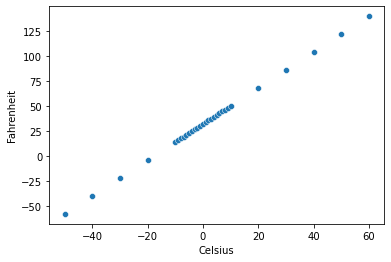

In [4]:
sns.scatterplot(x="Celsius", y="Fahrenheit", data= data)

<AxesSubplot:>

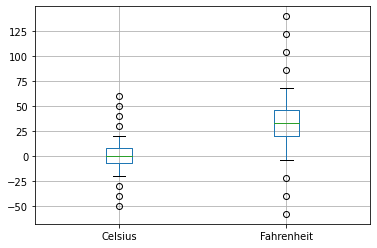

In [5]:
data.boxplot()

In [29]:
x= data[["Celsius"]]
y= data["Fahrenheit"]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [45]:

tf.random.set_seed(42)

model1= keras.Sequential([
    keras.layers.InputLayer(input_shape=(1,)),
    keras.layers.Dense(units=1,activation= None),
#     keras.layers.Dense(units=1,activation= None)
], name="model1")

model1.compile(loss=keras.losses.MeanSquaredError(),
               optimizer= keras.optimizers.Adam(learning_rate=0.1))

hist= model1.fit(x_train, y_train, epochs=800)

Epoch 1/800
1/1 [==============================] - 0s 2ms/step - loss: 1928.7920
Epoch 2/800
1/1 [==============================] - 0s 2ms/step - loss: 1785.4955
Epoch 3/800
1/1 [==============================] - 0s 2ms/step - loss: 1653.7881
Epoch 4/800
1/1 [==============================] - 0s 4ms/step - loss: 1533.8295
Epoch 5/800
1/1 [==============================] - 0s 3ms/step - loss: 1425.7090
Epoch 6/800
1/1 [==============================] - 0s 1ms/step - loss: 1329.4296
Epoch 7/800
1/1 [==============================] - 0s 2ms/step - loss: 1244.8931
Epoch 8/800
1/1 [==============================] - 0s 2ms/step - loss: 1171.8867
Epoch 9/800
1/1 [==============================] - 0s 2ms/step - loss: 1110.0652
Epoch 10/800
1/1 [==============================] - 0s 2ms/step - loss: 1058.9395
Epoch 11/800
1/1 [==============================] - 0s 2ms/step - loss: 1017.8668
Epoch 12/800
1/1 [==============================] - 0s 2ms/step - loss: 986.0484
Epoch 13/800
1/1 [========

In [46]:
model1.get_weights()

# y= 1.81 * x + 31.79

[array([[1.8002751]], dtype=float32), array([31.796492], dtype=float32)]

In [50]:
x_test= tf.constant(x_test)
y_test= tf.constant(y_test)
model1.evaluate(x_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.0407


0.04065379872918129

In [51]:
preds= model1.predict(x_test)

In [52]:
from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.9999483645187582

<AxesSubplot:>

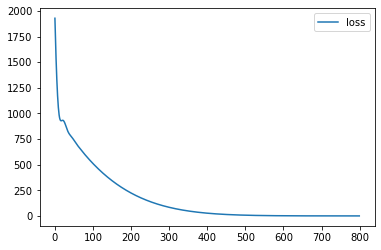

In [53]:
pd.DataFrame(hist.history).plot()